In [6]:
import numpy as np
#import scipy.linalg as SL
#import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter, defaultdict

#load train and test data into dataframe
x_train = pd.read_csv("X_train.csv", header=None)
y_train = pd.read_csv("y_train.csv", header=None)
x_test = pd.read_csv("X_test.csv", header=None)
y_test = pd.read_csv("y_test.csv", header=None)

#x_train = pd.DataFrame.to_dict(x_train)
#y_train = y_train.tolist()
#x_test = pd.DataFrame.to_dict(x_test)
#y_test = pd.DataFrame.to_dict(y_test)

In [9]:
#calculate pi, as pi = sum(yi)/n
n = len(y_train)
print n
pi = sum(y_train[0]) / float(len(y_train[0]))
print pi

4508
0.393966282165


In [28]:
#calculate theta y(1) and theta y(2)
#for class y = 1
Theta_label1 = []
row_indices = np.where(y_train == 1)[0]
n_label1 = len(row_indices)
X_temp = x_train.loc[row_indices]           #choose the data of one specific label from X
for i in range(54):                #calculate theta y(1)
    a = sum(X_temp.loc[:,i])  / float(n_label1)  
    Theta_label1.append(a)


for i in range(54,57):
    a = float(n_label1) / sum(np.log(X_temp.loc[:,i]))    #calculate theta y(2)
    Theta_label1.append(a)

In [31]:
#calculate theta y(1) and theta y(2)
#for class y = 0
Theta_label0 = []
row_indices = np.where(y_train == 0)[0]
n_label0 = len(row_indices)
X_temp_0 = x_train.loc[row_indices]           #choose the data of one specific label from X
for i in range(54):                #calculate theta y(1)
    a = sum(X_temp_0.loc[:,i])  / float(n_label0)  
    Theta_label0.append(a)


for i in range(54,57):
    a = float(n_label0) / sum(np.log(X_temp_0.loc[:,i]))    #calculate theta y(2)
    Theta_label0.append(a)

In [80]:
#function calculate the prob when y0 is 1
n_test = len(y_test)
y_prob_1 = []
y_prob_0 = []

#if suppose y0 = 1
for m in range(n_test):
    prob = 1
    x_instance = x_test.loc[m]
    for i in range(57):
        if i in range(54):
            theta_1 = float(Theta_label1[i])
            x0 = float(x_instance[i])
            a = theta_1**x0
            b = (1-theta_1)**(1-x0)
            prob_temp1 = a*b
            prob = prob*prob_temp1
        else :
            theta_2 = float(Theta_label1[i])
            x0 = float(x_instance[i])
            a = x0**(-(theta_2+1))
            prob_temp2 = theta_2*a
            prob = prob*prob_temp2
    prob = prob*pi
    y_prob_1.append(prob)

#if suppose y0 = 1
for m in range(n_test):
    prob = 1
    x_instance = x_test.loc[m]
    for i in range(57):
        if i in range(54):
            theta_1 = float(Theta_label0[i])
            x0 = float(x_instance[i])
            a = theta_1**x0
            b = (1-theta_1)**(1-x0)
            prob_temp1 = a*b
            prob = prob*prob_temp1
        else :
            theta_2 = Theta_label0[i]
            x0 = x_instance[i]
            a = x0**(-(theta_2+1))
            prob_temp2 = theta_2*a
            prob = prob*prob_temp2
    prob = prob*(1-pi)
    y_prob_0.append(prob)    
    

In [85]:
#predict y0
predicted_Y_values = []
for i in range(n_test):
    if float(y_prob_1[i]) > float(y_prob_0[i]):
        predicted_Y_values.append(1)
    else:
        predicted_Y_values.append(0)

In [87]:
ground_truth = np.asarray(y_test[0])
predicted_Y_values_1 = np.asarray(predicted_Y_values)
X = pd.DataFrame({'prediction': predicted_Y_values_1, 
                  'ground_truth': ground_truth})
X['count'] = 1
X.groupby(('prediction','ground_truth')).sum().reset_index().pivot('prediction', 'ground_truth', 'count')

ground_truth,0,1
prediction,,
0,54,5
1,2,32


In [88]:
N = len(y_test[0])
print N
X['count'] = 1
X.groupby(('prediction','ground_truth')).sum().reset_index().pivot('prediction', 'ground_truth', 'count') / N 

93


ground_truth,0,1
prediction,,
0,0.580645,0.053763
1,0.021505,0.344086


In [89]:
0.580645 + 0.344086

0.924731

In [92]:
Theta_0_Bern

[0.14860907759882869,
 0.099194729136163978,
 0.27708638360175697,
 0.0029282576866764276,
 0.2225475841874085,
 0.11530014641288433,
 0.015739385065885798,
 0.07320644216691069,
 0.079428989751098092,
 0.1698389458272328,
 0.05197657393850659,
 0.42569546120058566,
 0.11749633967789165,
 0.045387994143484628,
 0.017935578330893119,
 0.091142020497803802,
 0.095534407027818444,
 0.12481698389458272,
 0.58162518301610544,
 0.016837481698389459,
 0.34187408491947291,
 0.0080527086383601759,
 0.027452415812591509,
 0.019765739385065886,
 0.37371888726207908,
 0.28184480234260617,
 0.2774524158125915,
 0.15592972181551976,
 0.12920937042459738,
 0.16142020497803808,
 0.10358711566617862,
 0.07320644216691069,
 0.12371888726207907,
 0.073938506588579797,
 0.15775988286969253,
 0.17496339677891654,
 0.26207906295754024,
 0.018301610541727673,
 0.11456808199121522,
 0.089311859443631042,
 0.052708638360175697,
 0.11566617862371889,
 0.10395314787701318,
 0.10029282576866765,
 0.29758418740849

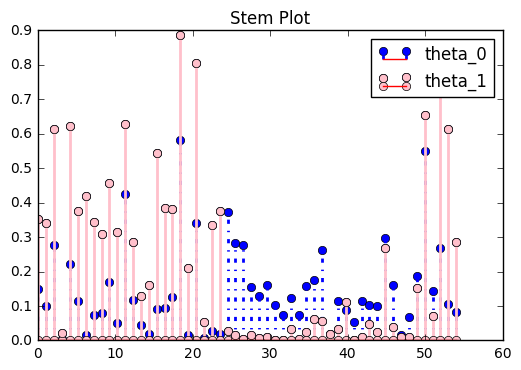

In [101]:
#stem plot
import matplotlib.pyplot as plt
Theta_Bern0 = Theta_label0[:54]
Theta_Bern1 = Theta_label1[:54]

n = np.linspace(0.1,54,54)
markerline_0, stemlines_0, baseline_0 = plt.stem(n, Theta_Bern0, '-.', label='theta_0')
plt.setp(stemlines_0, 'color', 'blue','linewidth', 2)

markerline_1, stemlines_1, baseline_1 = plt.stem(n, Theta_Bern1, '-o', label='theta_1')
plt.setp(stemlines_1, 'color', 'pink', 'linewidth', 2)

plt.title("Stem Plot")
plt.legend()
plt.show()


In [168]:
train_data = pd.concat([x_train, y_train], axis=1)
test_data = pd.concat([x_test, y_test], axis=1)

In [169]:
def directDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += abs((instance1[x] - instance2[x]))
    return distance

In [170]:
import operator 
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		a = (trainingSet.loc[x]).tolist()
		dist = directDistance(testInstance, a, length)
		distances.append((trainingSet.loc[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

In [200]:
import operator
def getResponse(neighbors):
	classVotes = {}
	for x in range(len(neighbors)):
		response = (neighbors[x]).tolist()[-1]
		if response in classVotes:
			classVotes[response] += 1
		else:
			classVotes[response] = 1
	sortedVotes = sorted(classVotes.iteritems(), key=operator.itemgetter(1), reverse=True)
	return sortedVotes[0][0]

In [172]:
len(test_data)

93

In [173]:
k = 1
n = len(test_data)
neighbors_1 =[]
for i in range(n):
    a = (test_data.loc[i]).tolist()
    neighbors = getNeighbors(train_data, a, k)
    neighbors_1.append(neighbors)

print len(neighbors_1)

response_1 =[]
for i in range(n):
    response = getResponse(neighbors_1[i])
    response_1.append(response)
    
print len(response_1)

93


In [177]:
ground_truth = np.asarray(y_test[0])
predicted_Y_values_1 = np.asarray(response_1)
X = pd.DataFrame({'prediction': predicted_Y_values_1, 
                  'ground_truth': ground_truth})
X['count'] = 1
X.groupby(('prediction','ground_truth')).sum().reset_index().pivot('prediction', 'ground_truth', 'count')

ground_truth,0,1
prediction,,
0,51,5
1,5,32


In [183]:
N = len(y_test[0])
print N
X['count'] = 1
X_perc = X.groupby(('prediction','ground_truth')).sum().reset_index().pivot('prediction', 'ground_truth', 'count') / N
X_perc

93


ground_truth,0,1
prediction,,
0,0.548387,0.053763
1,0.053763,0.344086


In [185]:
predic_accuracy = []
accuracy = X_perc[0][0] +X_perc[1][1]
predic_accuracy.append(accuracy)
predic_accuracy

[0.89247311827956988]

In [196]:
print len(neighbors_1[0])

1


In [186]:
k = 2
n = len(test_data)
neighbors_2 =[]
for i in range(n):
    a = (test_data.loc[i]).tolist()
    neighbors = getNeighbors(train_data, a, k)
    neighbors_2.append(neighbors)

print len(neighbors_2[0])

response_2 =[]
for i in range(n):
    response = getResponse(neighbors_2[i])
    response_2.append(response)
    
print len(response_2)

93
93


In [203]:
ground_truth = np.asarray(y_test[0])
predicted_Y_values_1 = np.asarray(response_2)
X = pd.DataFrame({'prediction': predicted_Y_values_1, 
                  'ground_truth': ground_truth})
X['count'] = 1
X.groupby(('prediction','ground_truth')).sum().reset_index().pivot('prediction', 'ground_truth', 'count')

N = len(y_test[0])
print N
X['count'] = 1
X_perc = X.groupby(('prediction','ground_truth')).sum().reset_index().pivot('prediction', 'ground_truth', 'count') / N
X_perc

accuracy = X_perc[0][0] +X_perc[1][1]
predic_accuracy.append(accuracy)
predic_accuracy

93


0.86021505376344076

In [207]:
ground_truth = np.asarray(y_test[0])
predicted_Y_values_1 = np.asarray(response_3)
X = pd.DataFrame({'prediction': predicted_Y_values_1, 
                  'ground_truth': ground_truth})
X['count'] = 1
X.groupby(('prediction','ground_truth')).sum().reset_index().pivot('prediction', 'ground_truth', 'count')

N = len(y_test[0])
print N
X['count'] = 1
X_perc = X.groupby(('prediction','ground_truth')).sum().reset_index().pivot('prediction', 'ground_truth', 'count') / N
X_perc

accuracy = X_perc[0][0] +X_perc[1][1]
predic_accuracy.append(accuracy)
predic_accuracy

93


[0.89247311827956988, 0.86021505376344076, 0.86021505376344076]

In [212]:
predic_accuracy

[0.89247311827956988, 0.86021505376344076, 0.86021505376344076]

In [218]:
def k_neighbors(k,testdata,traindata):
    n = len(testdata)
    neighbors_3 =[]
    for i in range(n):
        a = (testdata.loc[i]).tolist()
        neighbors = getNeighbors(traindata, a, k)
        neighbors_3.append(neighbors)
    return neighbors_3

def k_response(neighbors):
    n = len(neighbors)
    response_3 =[]
    for i in range(n):
        response = getResponse(neighbors[i])
        response_3.append(response)
    return response_3

def predi_accuracy(response,testdata):
    ground_truth = np.asarray(testdata[0])
    predicted_Y_values_1 = np.asarray(response)
    X = pd.DataFrame({'prediction': predicted_Y_values_1, 
                  'ground_truth': ground_truth})
    X['count'] = 1
    X.groupby(('prediction','ground_truth')).sum().reset_index().pivot('prediction', 'ground_truth', 'count')

    N = len(response)
    X['count'] = 1
    X_perc = X.groupby(('prediction','ground_truth')).sum().reset_index().pivot('prediction', 'ground_truth', 'count') / N
    X_perc

    accuracy = X_perc[0][0] +X_perc[1][1]
    return accuracy


In [214]:
neighbors_4 = k_neighbors(4,test_data,train_data)
print len(neighbors_4)

response_4 = k_response(neighbors_4)
print len(response_4)

accuracy = predi_accuracy(response_4,y_test)
predic_accuracy.append(accuracy)
predic_accuracy

4


In [222]:
neighbors_5_20 = {}
response_5_20 = {}
for i in range(5,21):
    neighbors_5_20[i] = k_neighbors(i,test_data,train_data)
    print len(neighbors_5_20[i])
    print len(neighbors_5_20[i][0])

    response_5_20[i] = k_response(neighbors_5_20[i])
    print len(response_5_20[i])

    accuracy = predi_accuracy(response_5_20[i],y_test)
    predic_accuracy.append(accuracy)
    print predic_accuracy

93
5
93
[0.89247311827956988, 0.86021505376344076, 0.86021505376344076, 0.90322580645161299, 0.88172043010752688]
93
6
93
[0.89247311827956988, 0.86021505376344076, 0.86021505376344076, 0.90322580645161299, 0.88172043010752688, 0.89247311827956977]
93
7
93
[0.89247311827956988, 0.86021505376344076, 0.86021505376344076, 0.90322580645161299, 0.88172043010752688, 0.89247311827956977, 0.86021505376344076]
93
8
93
[0.89247311827956988, 0.86021505376344076, 0.86021505376344076, 0.90322580645161299, 0.88172043010752688, 0.89247311827956977, 0.86021505376344076, 0.88172043010752676]
93
9
93
[0.89247311827956988, 0.86021505376344076, 0.86021505376344076, 0.90322580645161299, 0.88172043010752688, 0.89247311827956977, 0.86021505376344076, 0.88172043010752676, 0.90322580645161288]
93
10
93
[0.89247311827956988, 0.86021505376344076, 0.86021505376344076, 0.90322580645161299, 0.88172043010752688, 0.89247311827956977, 0.86021505376344076, 0.88172043010752676, 0.90322580645161288, 0.88172043010752676]


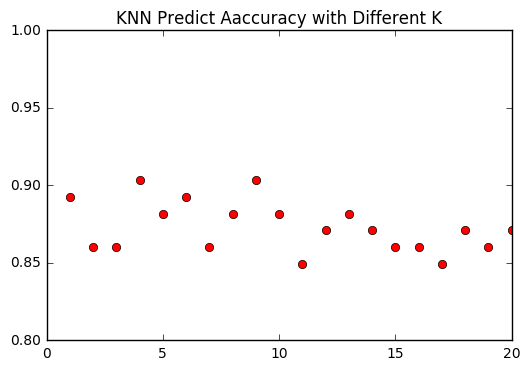

In [781]:
import matplotlib.pyplot as plt
plt.plot(range(1,21), predic_accuracy, 'ro')
plt.axis([0, 20, 0.8, 1])
plt.title("KNN Predict Aaccuracy with Different K")
plt.show()

(D)plot the logistic regression objective training function L per iteration.

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

from collections import Counter, defaultdict

#load train and test data into dataframe
x_train = pd.read_csv("X_train.csv", header=None)
y_train = pd.read_csv("y_train.csv", header=None)
x_test = pd.read_csv("X_test.csv", header=None)
y_test = pd.read_csv("y_test.csv", header=None)

from scipy.special import expit
#expit(x_test_log.dot(w0))

def add_one_demsnion(X):
        bias_col = np.ones((X.shape[0], 1))
        return np.concatenate([bias_col, X], axis=1)

x_test_log = add_one_demsnion(x_test)
x_train_log = add_one_demsnion(x_train)

y_train_log = y_train
y_test_log = y_test

row_indices = np.where(y_train == 0)[0]
row_indices_1 = np.where(y_test == 0)[0]

y_train_log.loc[row_indices,0] = -1           #change y=0 to y=-1
y_test_log.loc[row_indices_1,0] = -1 
    
#def logistic_func(theta, x):
#    return float(1) / (1 + math.e**(-x.dot(theta)))

def logistic_regression_objective_1(w, x, y):
    x = np.array(x)
    xw = np.dot(x,w)
    sigma_w = expit(y*xw)
    return sigma_w



In [35]:
print len(L_final_test)

10000


In [30]:
import math
wi = np.zeros(x_train_log.shape[1])
L_final_test = []
for i in range(10000):
    aita = float(1) / (10**5)*math.sqrt( i+1 )
    n = len(y_train_log)
    L = 0
    m1 = 0
    for i in range(n):
        sigma = logistic_regression_objective_1(wi,x_train_log[i],y_train_log[0][i])
        m1 = m1 + (1-sigma)*y_train_log[0][i]*x_train_log[i]
        if sigma == 0:
            #L += sigma 
            sigma = 0.0001
            #L += np.dot(x_train_log[i],wi)
            L += np.log(sigma)
        else:
            L += np.log(sigma)
        
    
    wi = wi + aita*m1
    L_final_test.append(L)

#print L_final

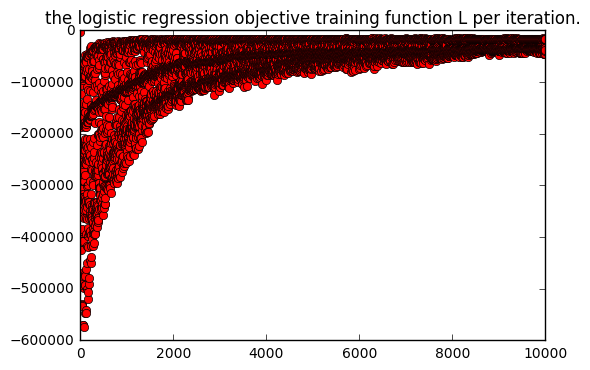

In [36]:
plt.plot(range(1,10001), L_final_test, 'ro')
plt.title("the logistic regression objective training function L per iteration.")
plt.show()

(e) Newton’s method

In [21]:
import numpy as np
#import scipy.linalg as SL
#import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter, defaultdict

#load train and test data into dataframe
x_train = pd.read_csv("X_train.csv", header=None)
y_train = pd.read_csv("y_train.csv", header=None)
x_test = pd.read_csv("X_test.csv", header=None)
y_test = pd.read_csv("y_test.csv", header=None)

#x_train = pd.DataFrame.to_dict(x_train)
#y_train = y_train.tolist()
#x_test = pd.DataFrame.to_dict(x_test)
#y_test = pd.DataFrame.to_dict(y_test)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

from scipy.special import expit
#expit(x_test_log.dot(w0))

def add_one_demsnion(X):
        bias_col = np.ones((X.shape[0], 1))
        return np.concatenate([bias_col, X], axis=1)

x_test_log = add_one_demsnion(x_test)
x_train_log = add_one_demsnion(x_train)

y_train_log = y_train
y_test_log = y_test

row_indices = np.where(y_train == 0)[0]
row_indices_1 = np.where(y_test == 0)[0]

y_train_log.loc[row_indices,0] = -1           #change y=0 to y=-1
y_test_log.loc[row_indices_1,0] = -1 
    
#def logistic_func(theta, x):
#    return float(1) / (1 + math.e**(-x.dot(theta)))


In [22]:
def logistic_regression_objective_1(w, x, y):
    x = np.array(x)
    xw = np.dot(x,w)
    sigma_w = expit(y*xw)
    return sigma_w


#print L_final
import math
wi = np.zeros(x_train_log.shape[1])
L_final_test_3 = []
for i in range(100):
    aita = float(1) / math.sqrt( j+1+1 )
    n = len(y_train_log)
    L = 0
    m1 = 0
    m2 = 0
    for i in range(n):
        xi = x_train_log[i,:].reshape(58,1)
        sigma = logistic_regression_objective_1(wi,x_train_log[i],y_train_log[0][i])
        sigma2 = logistic_regression_objective_1(wi,x_train_log[i],1)
        m1 = m1 + (1-sigma)*y_train_log[0][i]*x_train_log[i]
        m2 = m2 - sigma2*(1-sigma2)*np.dot(xi, xi.T)
        if sigma == 0:
            #L += sigma 
            sigma = 0.0001
            #L += np.dot(x_train_log[i],wi)
            L += np.log(sigma)
        else:
            L += np.log(sigma)
        
    
    wi = wi - aita*np.dot(np.linalg.inv(m2),m1)
    L_final_test_3.append(L)

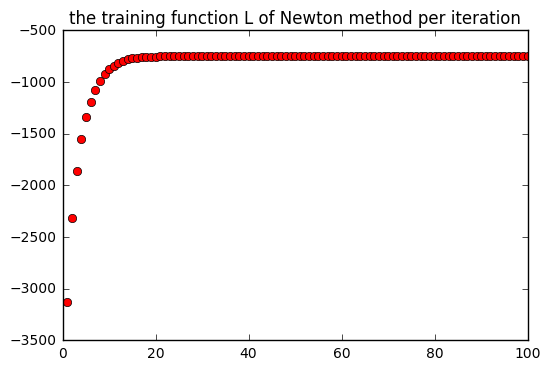

In [23]:
import matplotlib.pyplot as plt
#plt.plot(range(1,101), L_final_2, 'ro')
plt.plot(range(1,101), L_final_test_3, 'ro')
plt.title("the training function L of Newton method per iteration")
plt.show()

In [30]:
y[17]

0

In [31]:
#predict the test
n = len(y_test_log)
w = wi
y = [0]*n
for i in range(n):
    xi = x_test_log[i,:]    
    xw = np.dot(xi,w)
    sigma = expit(xw)
    #print sigma
    if sigma >= 0.5:
        y[i] = 1
    else:
        y[i] = -1
print y   

[1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1]


In [32]:
ground_truth = np.asarray(list(y_test_log[0]))
predicted_Y_values_1 = np.asarray(list(y))
X = pd.DataFrame({'prediction': predicted_Y_values_1, 
                  'ground_truth': ground_truth})
X['count'] = 1
X.groupby(('prediction','ground_truth')).sum().reset_index().pivot('prediction', 'ground_truth', 'count')

ground_truth,-1,1
prediction,,
-1,54,6
1,2,31


In [33]:
N = len(y_test_log[0])
print N
X['count'] = 1
X_perc = X.groupby(('prediction','ground_truth')).sum().reset_index().pivot('prediction', 'ground_truth', 'count') / N
X_perc

93


ground_truth,-1,1
prediction,,
-1,0.580645,0.064516
1,0.021505,0.333333


In [34]:
0.580645+0.333333

0.913978

In [2]:
!jupyter nbconvert --to script pc2756_hw2.ipynb

[NbConvertApp] Converting notebook pc2756_hw2.ipynb to script
[NbConvertApp] Writing 15133 bytes to pc2756_hw2.py
